# The helicity basis and the dot product

In [1]:
from sympy import init_printing
init_printing() 

In [2]:
from sympy import Symbol,Matrix,symbols
from sympy import I,conjugate
from sympy import sin,cos,exp,sqrt,pi
from sympy import pprint
from sympy import simplify

from fast.symbolic import define_laser_variables, polarization_vector
from fast.symbolic import cartesian_to_helicity, helicity_to_cartesian, helicity_dot_product
from fast.symbolic import define_r_components

Two vectors defined through their components in the cartesian basis,

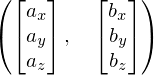

In [3]:
a=Matrix(symbols("a_x a_y a_z"))
b=Matrix(symbols("b_x b_y b_z"))
a,b

have their dot product is defined as

In [4]:
a.dot(b)

The vectors can be expressed through their components $a_{-1},\ a_{0},\ a_{+1}$ and $b_{-1},\ b_{0},\ b_{+1}$ in the helicity basis as

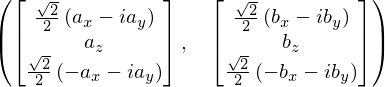

In [5]:
a_helicity=cartesian_to_helicity(a)
b_helicity=cartesian_to_helicity(b)

a_helicity, b_helicity

The dot product of two vectors in the helicity basis can be prooved to be $\vec{a}\cdot\vec{b}=- a_{-1}b_{+1} +a_{0}   b_{0} -a_{+1} b_{-1}$

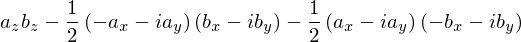

In [6]:
helicity_dot_product(a_helicity,b_helicity)

In [7]:
simplify( helicity_dot_product(a_helicity,b_helicity) )

# The electric field
We define a few important symbols

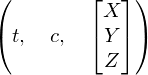

In [18]:
t,c=symbols("t c",positive=True)
X,Y,Z=symbols("X Y Z",real=True)
R=Matrix([X,Y,Z])
t,c,R

We will specify the electric field associated to a plane wave with arbitrary amplitude and frequency

In [9]:
E0,omega_laser=define_laser_variables(1)
E0,omega_laser

propagating through an arbitrary wave vector $\vec{k}$

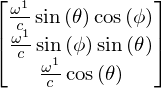

In [10]:
phi,theta,alpha,beta=symbols("phi theta alpha beta")

k=omega_laser[0]/c*Matrix([cos(phi)*sin(theta),sin(phi)*sin(theta),cos(theta)])
k

with an arbitrary polarization,

In [12]:
ep=polarization_vector(phi,theta,alpha,beta, 1)
em=polarization_vector(phi,theta,alpha,beta,-1)
pprint([ep,em])

⎡⎡(-sin(2⋅α)⋅sin(φ) + cos(2⋅α)⋅cos(φ)⋅cos(θ))⋅cos(2⋅β) + ⅈ⋅(-sin(2⋅α)⋅cos(φ)⋅c
⎢⎢                                                                            
⎢⎢(sin(2⋅α)⋅cos(φ) + sin(φ)⋅cos(2⋅α)⋅cos(θ))⋅cos(2⋅β) + ⅈ⋅(-sin(2⋅α)⋅sin(φ)⋅co
⎢⎢                                                                            
⎣⎣                            ⅈ⋅sin(2⋅α)⋅sin(2⋅β)⋅sin(θ) - sin(θ)⋅cos(2⋅α)⋅cos

os(θ) - sin(φ)⋅cos(2⋅α))⋅sin(2⋅β)⎤, ⎡(-sin(2⋅α)⋅sin(φ) + cos(2⋅α)⋅cos(φ)⋅cos(θ
                                 ⎥  ⎢                                         
s(θ) + cos(2⋅α)⋅cos(φ))⋅sin(2⋅β) ⎥  ⎢(sin(2⋅α)⋅cos(φ) + sin(φ)⋅cos(2⋅α)⋅cos(θ)
                                 ⎥  ⎢                                         
(2⋅β)                            ⎦  ⎣                           -ⅈ⋅sin(2⋅α)⋅si

))⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α)⋅cos(φ)⋅cos(θ) - sin(φ)⋅cos(2⋅α))⋅sin(2⋅β)⎤⎤
                                                                    ⎥⎥
)⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α)⋅sin(φ)⋅cos(θ) + cos(2⋅α)⋅cos(φ))⋅sin(2⋅β

The electric field is given by

In [20]:
arg=k.dot(R)-omega_laser[0]*t
E=E0[0]/2*(ep*exp(+arg) + em*exp( -arg))
pprint(E)

⎡         ⎛                                                                   
⎢         ⎜                                                                   
⎢         ⎜                                                                   
⎢E_0__{1}⋅⎝((-sin(2⋅α)⋅sin(φ) + cos(2⋅α)⋅cos(φ)⋅cos(θ))⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢          ⎛                                                                  
⎢          ⎜                                                                  
⎢          ⎜                                                                  
⎢ E_0__{1}⋅⎝((sin(2⋅α)⋅cos(φ) + sin(φ)⋅cos(2⋅α)⋅cos(θ))⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                   

Which can be seen to be orthogonal to the propagation direction.

In [15]:
simplify(E.dot(k))

We can simplify this expression by noting that in the cases of our interest the wavelengths of the fields (780 nm and 776 nm) are much longer than the atomic radius (248 pm for rubidium) the spacial variation of the field is relatively insignificant, so a single point to evaluate this field can be taken at $\vec{R}=0$, and thus the field can be taken as

In [21]:
arg=-omega_laser[0]*t
E=E0[0]/2*(ep*exp(+arg) + em*exp( -arg))
pprint(E)

⎡         ⎛                                                                   
⎢E_0__{1}⋅⎝((-sin(2⋅α)⋅sin(φ) + cos(2⋅α)⋅cos(φ)⋅cos(θ))⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢          ⎛                                                                  
⎢ E_0__{1}⋅⎝((sin(2⋅α)⋅cos(φ) + sin(φ)⋅cos(2⋅α)⋅cos(θ))⋅cos(2⋅β) - ⅈ⋅(-sin(2⋅α
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                ⎛            
⎢                                                       E_0__{1}⋅⎝(-ⅈ⋅sin(2⋅α)
⎢                                                   

# The position operator in the helicity basis.
We can write think of the position operator as a vector of operators $\vec{\hat{r}}$ that act on a Hilbert space of a given dimension. In this case we will use dimension 2.

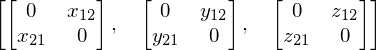

In [24]:
r_cartesian=define_r_components(2)
r_cartesian

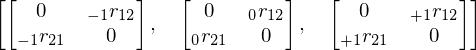

In [26]:
r_helicity=define_r_components(2,helicity=True)
r_helicity

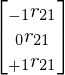

In [27]:
r_helicity21=Matrix([r_helicity[0][1,0],r_helicity[1][1,0],r_helicity[2][1,0]])
r_helicity21

We take $\vec{r}_{ij}$ in the helicity basis, and transforming it to the cartesian and taking the complex conjugate basis we get $\vec{r}_{ji}$, which in turn can be taken back to the helicity basis to obtain $\vec{r}_{ji}$ in terms of $\vec{r}_{ij}$ in the helicity basis.

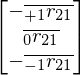

In [29]:
simplify( cartesian_to_helicity(conjugate(helicity_to_cartesian(r_helicity21))) )

Check whether this actually makes $\vec{\hat{r}}$ hermitian.

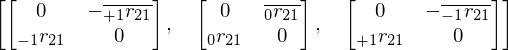

In [31]:
r_helicity=define_r_components(2,helicity=True,explicitly_hermitian=True)
r_helicity

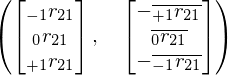

In [32]:
r_helicity21=Matrix([r_helicity[0][1,0],r_helicity[1][1,0],r_helicity[2][1,0]])
r_helicity12=Matrix([r_helicity[0][0,1],r_helicity[1][0,1],r_helicity[2][0,1]])
r_helicity21,r_helicity12

In [34]:
simplify( helicity_to_cartesian(r_helicity21)-helicity_to_cartesian(r_helicity12).conjugate() )

So yes, this makes the $\vec{\hat{r}}$ operator hermitian.